VAR Method 

In [3]:
import pandas as pd 
import numpy as np 
import math as mt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.vector_ar.var_model import VAR
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
#Use the path where the data is stored
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df2['Time'].astype(str)
#Combining date and time to convert it further into date time format
df2['Date']= pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2 = df2.drop(['Time'],axis = 1)
df3=df2
df2 = df2.set_index("Date")
#Set the index to the date
data = df2


In [5]:
# Remove constant columns
non_constant_cols = [col for col in df2.columns if df2[col].nunique() > 1]
data = df2[non_constant_cols]

# Split the data into training and testing sets
train_end_date = pd.to_datetime('2022-05-15 23:00:00')
test_start_date = pd.to_datetime('2022-05-16 00:00:00')
test_end_date = pd.to_datetime('2022-08-20 19:00:00')

train_data = data.loc[data.index <= train_end_date]
test_data = data.loc[(data.index >= test_start_date) & (data.index <= test_end_date)]

# Fit the VAR model on the training data
model = VAR(train_data)
model_fit = model.fit()

# Make predictions on the testing data
predictions = model_fit.forecast(model_fit.y, steps=len(test_data))

# Convert the predictions to a DataFrame
pred_df = pd.DataFrame(predictions, index=test_data.index, columns=test_data.columns)

# Evaluate the predictions
mse = np.mean((pred_df['Failure'] - test_data['Failure']) ** 2)
mae = np.mean(np.abs(pred_df['Failure'] - test_data['Failure']))

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

# Visualize the predictions and actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Failure'], label='Training Data')
plt.plot(test_data.index, test_data['Failure'], label='Actual Failure')
plt.plot(pred_df.index, pred_df['Failure'], label='Predicted Failure')
plt.xlabel('Date and Time')
plt.ylabel('Failure')
plt.title('Machine Failure Prediction using VAR')
plt.legend()
plt.show()

C:\Users\Niranjan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: x contains one or more constant columns. Column(s) 8 are constant. Adding a constant with trend='c' is not allowed.

In [7]:
# Remove constant columns
non_constant_cols = [col for col in df2.columns if df2[col].nunique() > 1]
data = df2[non_constant_cols]

# Split the data into training and testing sets
train_end_date = pd.to_datetime('2022-05-15 23:00:00')
test_start_date = pd.to_datetime('2022-05-16 00:00:00')
test_end_date = pd.to_datetime('2022-08-20 19:00:00')

train_data = data.loc[data.index <= train_end_date]
test_data = data.loc[(data.index >= test_start_date) & (data.index <= test_end_date)]

# Fit the VAR model on the training data
model = VAR(train_data)
model_fit = model.fit(trend='c')  # Add constant trend term

# Make predictions on the testing data
predictions = model_fit.forecast(model_fit.y, steps=len(test_data))

# Convert the predictions to a DataFrame
pred_df = pd.DataFrame(predictions, index=test_data.index, columns=test_data.columns)

# Evaluate the predictions
mse = np.mean((pred_df['Failure'] - test_data['Failure']) ** 2)
mae = np.mean(np.abs(pred_df['Failure'] - test_data['Failure']))

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

# Visualize the predictions and actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Failure'], label='Training Data')
plt.plot(test_data.index, test_data['Failure'], label='Actual Failure')
plt.plot(pred_df.index, pred_df['Failure'], label='Predicted Failure')
plt.xlabel('Date and Time')
plt.ylabel('Failure')
plt.title('Machine Failure Prediction using VAR')
plt.legend()
plt.show()

C:\Users\Niranjan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: x contains one or more constant columns. Column(s) 8 are constant. Adding a constant with trend='c' is not allowed.

In [8]:
# Remove constant columns
non_constant_cols = [col for col in df2.columns if df2[col].nunique() > 1]
data = df2[non_constant_cols]

# Split the data into training and testing sets
train_end_date = pd.to_datetime('2022-05-15 23:00:00')
test_start_date = pd.to_datetime('2022-05-16 00:00:00')
test_end_date = pd.to_datetime('2022-08-20 19:00:00')

train_data = data.loc[data.index <= train_end_date]
test_data = data.loc[(data.index >= test_start_date) & (data.index <= test_end_date)]

# Fit the VAR model on the training data
model = VAR(train_data.drop('Failure', axis=1))  # Exclude 'Failure' column
model_fit = model.fit()

# Make predictions on the testing data
predictions = model_fit.forecast(model_fit.y, steps=len(test_data))

# Convert the predictions to a DataFrame
pred_df = pd.DataFrame(predictions, index=test_data.index, columns=train_data.columns[:-1])

# Evaluate the predictions
mse = np.mean((pred_df['Failure'] - test_data['Failure']) ** 2)
mae = np.mean(np.abs(pred_df['Failure'] - test_data['Failure']))

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

# Visualize the predictions and actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Failure'], label='Training Data')
plt.plot(test_data.index, test_data['Failure'], label='Actual Failure')
plt.plot(pred_df.index, pred_df['Failure'], label='Predicted Failure')
plt.xlabel('Date and Time')
plt.ylabel('Failure')
plt.title('Machine Failure Prediction using VAR')
plt.legend()
plt.show()

C:\Users\Niranjan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: x contains one or more constant columns. Column(s) 8 are constant. Adding a constant with trend='c' is not allowed.

In [10]:
from statsmodels.tsa.arima.model import ARIMA
data = df2

In [12]:
target_variable = 'Failure'

# Split the data into training and testing sets
train_end_date = pd.to_datetime('2022-05-15 23:00:00')
test_start_date = pd.to_datetime('2022-05-16 00:00:00')
test_end_date = pd.to_datetime('2022-08-20 19:00:00')

train_data = data.loc[data.index <= train_end_date, target_variable]
test_data = data.loc[(data.index >= test_start_date) & (data.index <= test_end_date), target_variable]

# Create and fit the ARIMA model
model = ARIMA(train_data, order=(1, 0, 0))
model_fit = model.fit()

# Make predictions for the testing data
predictions = model_fit.predict(start=test_start_date, end=test_end_date)

# Convert the predictions to a DataFrame
pred_df = pd.DataFrame(predictions, index=test_data.index, columns=[target_variable])

# Evaluate the predictions
mse = np.mean((pred_df[target_variable] - test_data) ** 2)
mae = np.mean(np.abs(pred_df[target_variable] - test_data))

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

# Visualize the predictions and actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Failure')
plt.plot(pred_df.index, pred_df[target_variable], label='Predicted Failure')
plt.xlabel('Date and Time')
plt.ylabel('Failure')
plt.title('Machine Failure Prediction using ARIMA')
plt.legend()
plt.show()

C:\Users\Niranjan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Niranjan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Niranjan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense



# Split the data into training and testing sets
train_end_date = pd.to_datetime('2022-05-15 23:00:00')
test_start_date = pd.to_datetime('2022-05-16 00:00:00')
test_end_date = pd.to_datetime('2022-08-20 19:00:00')

train_data = data.loc[data.index <= train_end_date]
test_data = data.loc[(data_interpolated.index >= test_start_date) & (data_interpolated.index <= test_end_date)]

# Normalize the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Reshape the data for CNN input
n_steps = 10  # Number of time steps (input sequence length)
n_features = train_data_scaled.shape[1]  # Number of features
X_train = np.reshape(train_data_scaled, (-1, n_steps, n_features))
X_test = np.reshape(test_data_scaled, (-1, n_steps, n_features))
y_train = train_data_scaled[n_steps:, train_data.columns.get_loc(target_variable)]
y_test = test_data_scaled[n_steps:, test_data.columns.get_loc(target_variable)]

# Create and compile the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Rescale the predictions to the original scale
predictions_rescaled = scaler.inverse_transform(np.concatenate((train_data_scaled[:n_steps], predictions), axis=0))
predictions_final = predictions_rescaled[n_steps:, train_data.columns.get_loc(target_variable)]

# Evaluate the predictions
mse = np.mean((predictions_final - test_data[target_variable][n_steps:]) ** 2)
mae = np.mean(np.abs(predictions_final - test_data[target_variable][n_steps:]))

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

ValueError: cannot reshape array of size 45056 into shape (10,22)

In [16]:
import pandas as pd
from prophet import Prophet

target_variable = 'Failure'

# Set the frequency of the date index
data = data.asfreq('H')

# Split the data into training and testing sets
train_end_date = pd.to_datetime('2022-05-15 23:00:00')
test_start_date = pd.to_datetime('2022-05-16 00:00:00')
test_end_date = pd.to_datetime('2022-08-20 19:00:00')

train_data = data.loc[data.index <= train_end_date]
test_data = data.loc[(data.index >= test_start_date) & (data.index <= test_end_date)]

# Prepare the data for Prophet
train_df = pd.DataFrame({'ds': train_data.index, 'y': train_data[target_variable]})
test_df = pd.DataFrame({'ds': test_data.index})

# Create and fit the Prophet model
model = Prophet()
model.fit(train_df)

# Make predictions for the test data
predictions = model.predict(test_df)

# Evaluate the predictions
mse = np.mean((predictions['yhat'].values - test_data[target_variable].values) ** 2)
mae = np.mean(np.abs(predictions['yhat'].values - test_data[target_variable].values))

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")


Importing plotly failed. Interactive plots will not work.
13:27:25 - cmdstanpy - INFO - Chain [1] start processing
13:27:25 - cmdstanpy - INFO - Chain [1] done processing


MSE: nan
MAE: nan


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sktime.forecasting.compose import RecursiveRegressionForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.transformers.compose import Tabularizer
from sktime.utils.data_processing import from_nested_to_2d_array
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess the dataset
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df2['Time'].astype(str)
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2 = df2.drop(['Time'], axis=1)
df2 = df2.set_index("Date")
df_for_training = df2.astype(float)
target_variable = 'Failure'

# Split the data into train and test sets based on the specified time range
train_data = df_for_training.loc[:'2022-05-15 23:00:00']
test_data = df_for_training.loc['2022-05-15 23:00:00':'2022-08-20 19:00:00']

# Set up the TFT pipeline
tabularizer = Tabularizer()
scaler = StandardScaler()

pipeline = RecursiveRegressionForecaster(
    steps=[
        ("tabularizer", tabularizer),
        ("scaler", scaler),
        ("estimator", Sequential([
            LSTM(64, activation='relu', input_shape=(train_data.shape[1], 1)),
            Dense(1)
        ]))
    ]
)

# Prepare the training data
X_train, y_train = train_data.drop(columns=target_variable), train_data[target_variable]

# Fit the TFT model
pipeline.fit(X_train, y_train)

# Prepare the testing data
X_test, y_test = test_data.drop(columns=target_variable), test_data[target_variable]

# Make predictions
y_pred = pipeline.predict(X_test)

# Convert predictions to pandas DataFrame
predicted_df = pd.DataFrame(y_pred, index=test_data.index, columns=[target_variable])

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(predicted_df.index, predicted_df[target_variable], label='Predicted')
plt.plot(test_data.index, test_data[target_variable], label='Actual')

plt.xlabel('Date')
plt.ylabel(target_variable)
plt.title('Failure Prediction with TFT')
plt.legend()
plt.show()


ImportError: cannot import name 'RecursiveRegressionForecaster' from 'sktime.forecasting.compose' (C:\Users\Niranjan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\compose\__init__.py)

In [22]:
import pandas as pd
import numpy as np
from gluonts.dataset.common import ListDataset
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer
import matplotlib.pyplot as plt

# Load and preprocess the dataset
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df2['Time'].astype(str)
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2 = df2.drop(['Time'], axis=1)
df2 = df2.set_index("Date")
df_for_training = df2.astype(float)
target_variable = 'Failure'

# Split the data into train and test sets based on the specified time range
train_data = df_for_training.loc[:'2022-05-15 23:00:00']
test_data = df_for_training.loc['2022-05-15 23:00:00':'2022-08-20 19:00:00']

# Prepare the training data in the required GluonTS format
train_data_list = [train_data[target_variable].values]
train_dataset = ListDataset(
    [{"start": train_data.index[0], "target": x} for x in train_data_list],
    freq="H"
)

# Define the DeepAR estimator
estimator = DeepAREstimator(
    freq="H",
    prediction_length=len(test_data),
    trainer=Trainer(epochs=10)
)

# Train the model
predictor = estimator.train(train_dataset)

# Prepare the test data in the required GluonTS format
test_data_list = [test_data[target_variable].values]
test_dataset = ListDataset(
    [{"start": test_data.index[0], "target": x} for x in test_data_list],
    freq="H"
)

# Make predictions on the test data
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_dataset,
    predictor=predictor,
    num_samples=100
)
forecasts = list(forecast_it)
test_target = list(ts_it)

# Retrieve the forecasted values
forecast_values = np.array([np.mean(forecast.samples, axis=0) for forecast in forecasts])

# Convert the forecasted values to a pandas DataFrame
predicted_df = pd.DataFrame(
    forecast_values,
    index=test_data.index,
    columns=[target_variable]
)

# Find the intersection points
intersections = predicted_df[predicted_df.eq(test_data.shift())].dropna()

# Plot the predicted and actual values with intersection points
plt.figure(figsize=(10, 6))
plt.plot(predicted_df.index, predicted_df[target_variable], label='Predicted')
plt.plot(test_data.index, test_data[target_variable], label='Actual')
plt.scatter(intersections.index, intersections[target_variable], color='red', label='Intersection')

plt.xlabel('Date')
plt.ylabel(target_variable)
plt.title('Failure Prediction with Intersection Points')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'gluonts'

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess the dataset
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df2['Time'].astype(str)
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2 = df2.drop(['Time'], axis=1)
df2 = df2.set_index("Date")
df_for_training = df2.astype(float)
target_variable = 'Failure'

# Split the data into train and test sets based on the specified time range
train_data = df_for_training.loc[:'2022-05-15 23:00:00']
test_data = df_for_training.loc['2022-05-15 23:00:00':'2022-08-20 19:00:00']

# Normalize the data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
n_steps = 12
n_features = df_for_training.shape[1]

# Prepare the training data
train_X, train_y = [], []
for i in range(n_steps, len(train_data_scaled)):
    train_X.append(train_data_scaled[i - n_steps:i])
    train_y.append(train_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
train_X, train_y = np.array(train_X), np.array(train_y)

# Prepare the test data
test_X, test_y = [], []
for i in range(n_steps, len(test_data_scaled)):
    test_X.append(test_data_scaled[i - n_steps:i])
    test_y.append(test_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
test_X, test_y = np.array(test_X), np.array(test_y)

# Reshape the training and test data to match the expected input shape of the TCN model
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], n_features))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], n_features))

# Define and train the TCN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dense(1))  # Update to have a single unit
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')  # Change loss function to 'mae'
model.fit(train_X, train_y, epochs=10, batch_size=16)

# Make predictions on the test data
predicted_y = model.predict(test_X)
predicted_df = pd.DataFrame(predicted_y, columns=[target_variable])
predicted_df.index = test_data.index[n_steps:]

# Convert the predicted values back to their original scale
predicted_df = pd.DataFrame(scaler.inverse_transform(predicted_df), columns=[target_variable])

# Create a DataFrame for the actual values
actual_df = pd.DataFrame(test_data[target_variable])

# Find the intersection points between the predicted and actual values
intersections = predicted_df[predicted_df.eq(actual_df.shift())].dropna()

# Plot the predicted and actual values with intersection points
plt.figure(figsize=(10, 6))
plt.plot(predicted_df.index, predicted_df[target_variable], label='Predicted')
plt.plot(actual_df.index, actual_df[target_variable], label='Actual')
plt.scatter(intersections.index, intersections[target_variable], color='red', label='Intersection')

# Set y-axis limits to only show values of 0 and 1
plt.ylim([-0.1, 1.1])

plt.xlabel('Date')
plt.ylabel(target_variable)
plt.title('Failure Prediction with Intersection Points')
plt.legend()
plt.show()


Epoch 1/10
128/128 [==============================] - 1s 1ms/step - loss: 0.0635
Epoch 2/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0412
Epoch 3/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0369
Epoch 4/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0352
Epoch 5/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0341
Epoch 6/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0336
Epoch 7/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0333
Epoch 8/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0329
Epoch 9/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 10/10
27/27 [==============================] - 0s 808us/step


ValueError: Must pass 2-d input. shape=(852, 6, 1)

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess the dataset
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df2['Time'].astype(str)
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2 = df2.drop(['Time'], axis=1)
df2 = df2.set_index("Date")
df_for_training = df2.astype(float)
target_variable = 'Failure'

# Split the data into train and test sets based on the specified time range
train_data = df_for_training.loc[:'2022-05-15 23:00:00']
test_data = df_for_training.loc['2022-05-15 23:00:00':'2022-08-20 19:00:00']

# Normalize the data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
n_steps = 12
n_features = df_for_training.shape[1]

# Prepare the training data
train_X, train_y = [], []
for i in range(n_steps, len(train_data_scaled)):
    train_X.append(train_data_scaled[i - n_steps:i])
    train_y.append(train_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
train_X, train_y = np.array(train_X), np.array(train_y)

# Prepare the test data
test_X, test_y = [], []
for i in range(n_steps, len(test_data_scaled)):
    test_X.append(test_data_scaled[i - n_steps:i])
    test_y.append(test_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
test_X, test_y = np.array(test_X), np.array(test_y)

# Reshape the training and test data to match the expected input shape of the TCN model
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], n_features))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], n_features))

# Define and train the TCN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dense(1))  # Update to have a single unit
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')  # Change loss function to 'mae'
model.fit(train_X, train_y, epochs=10, batch_size=16)

# Make predictions on the test data
predicted_y = model.predict(test_X)
predicted_y = np.reshape(predicted_y, (predicted_y.shape[0], 1))

# Convert the predicted values back to their original scale
predicted_y = scaler.inverse_transform(predicted_y)
predicted_df = pd.DataFrame(predicted_y, columns=[target_variable])
predicted_df.index = test_data.index[n_steps:]

# Create a DataFrame for the actual values
actual_df = pd.DataFrame(test_data[target_variable])

# Find the intersection points between the predicted and actual values
intersections = predicted_df[predicted_df.eq(actual_df.shift())].dropna()

# Plot the predicted and actual values with intersection points
plt.figure(figsize=(10, 6))
plt.plot(predicted_df.index, predicted_df[target_variable], label='Predicted')
plt.plot(actual_df.index, actual_df[target_variable], label='Actual')
plt.scatter(intersections.index, intersections[target_variable], color='red', label='Intersection')

# Set y-axis limits to only show values of 0 and 1
plt.ylim([-0.1, 1.1])

plt.xlabel('Date')
plt.ylabel(target_variable)
plt.title('Failure Prediction with Intersection Points')
plt.legend()
plt.show()


Epoch 1/10
128/128 [==============================] - 1s 1ms/step - loss: 0.0622
Epoch 2/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0408
Epoch 3/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0362
Epoch 4/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 5/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0335
Epoch 6/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0328
Epoch 7/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0323
Epoch 8/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0321
Epoch 9/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0320
Epoch 10/10
27/27 [==============================] - 0s 769us/step


ValueError: cannot reshape array of size 5112 into shape (852,1)

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess the dataset
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df2['Time'].astype(str)
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2 = df2.drop(['Time'], axis=1)
df2 = df2.set_index("Date")
df_for_training = df2.astype(float)
target_variable = 'Failure'

# Split the data into train and test sets based on the specified time range
train_data = df_for_training.loc[:'2022-05-15 23:00:00']
test_data = df_for_training.loc['2022-05-15 23:00:00':'2022-08-20 19:00:00']

# Normalize the data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
n_steps = 12
n_features = df_for_training.shape[1]

# Prepare the training data
train_X, train_y = [], []
for i in range(n_steps, len(train_data_scaled)):
    train_X.append(train_data_scaled[i - n_steps:i])
    train_y.append(train_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
train_X, train_y = np.array(train_X), np.array(train_y)

# Prepare the test data
test_X, test_y = [], []
for i in range(n_steps, len(test_data_scaled)):
    test_X.append(test_data_scaled[i - n_steps:i])
    test_y.append(test_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
test_X, test_y = np.array(test_X), np.array(test_y)

# Reshape the training and test data to match the expected input shape of the TCN model
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], n_features))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], n_features))

# Define and train the TCN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dense(1))  # Update to have a single unit
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')  # Change loss function to 'mae'
model.fit(train_X, train_y, epochs=10, batch_size=16)

# Make predictions on the test data
predicted_y = model.predict(test_X)
predicted_y = np.reshape(predicted_y, (predicted_y.shape[0], 1))

# Convert the predicted values back to their original scale
predicted_df = pd.DataFrame(scaler.inverse_transform(predicted_y), columns=[target_variable])
predicted_df.index = test_data.index[n_steps:]

# Create a DataFrame for the actual values
actual_df = pd.DataFrame(test_data[target_variable])

# Find the intersection points between the predicted and actual values
intersections = predicted_df[predicted_df.eq(actual_df.shift())].dropna()

# Plot the predicted and actual values with intersection points
plt.figure(figsize=(10, 6))
plt.plot(predicted_df.index, predicted_df[target_variable], label='Predicted')
plt.plot(actual_df.index, actual_df[target_variable], label='Actual')
plt.scatter(intersections.index, intersections[target_variable], color='red', label='Intersection')

# Set y-axis limits to only show values of 0 and 1
plt.ylim([-0.1, 1.1])

plt.xlabel('Date')
plt.ylabel(target_variable)
plt.title('Failure Prediction with Intersection Points')
plt.legend()
plt.show()


Epoch 1/10
128/128 [==============================] - 2s 2ms/step - loss: 0.0714
Epoch 2/10
128/128 [==============================] - 0s 2ms/step - loss: 0.0413
Epoch 3/10
128/128 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 4/10
128/128 [==============================] - 0s 2ms/step - loss: 0.0347
Epoch 5/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0336
Epoch 6/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0331
Epoch 7/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0329
Epoch 8/10
128/128 [==============================] - 0s 2ms/step - loss: 0.0326
Epoch 9/10
128/128 [==============================] - 0s 2ms/step - loss: 0.0323
Epoch 10/10
27/27 [==============================] - 0s 846us/step


ValueError: cannot reshape array of size 5112 into shape (852,1)

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess the dataset
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df2['Time'].astype(str)
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2 = df2.drop(['Time'], axis=1)
df2 = df2.set_index("Date")
df_for_training = df2.astype(float)
target_variable = 'Failure'

# Split the data into train and test sets based on the specified time range
train_data = df_for_training.loc[:'2022-05-15 23:00:00']
test_data = df_for_training.loc['2022-05-15 23:00:00':'2022-08-20 19:00:00']

# Normalize the data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
n_steps = 12
n_features = df_for_training.shape[1]

# Prepare the training data
train_X, train_y = [], []
for i in range(n_steps, len(train_data_scaled)):
    train_X.append(train_data_scaled[i - n_steps:i])
    train_y.append(train_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
train_X, train_y = np.array(train_X), np.array(train_y)

# Prepare the test data
test_X, test_y = [], []
for i in range(n_steps, len(test_data_scaled)):
    test_X.append(test_data_scaled[i - n_steps:i])
    test_y.append(test_data_scaled[i, df_for_training.columns.get_loc(target_variable)])
test_X, test_y = np.array(test_X), np.array(test_y)

# Reshape the training and test data to match the expected input shape of the TCN model
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], n_features))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], n_features))

# Define and train the TCN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')
model.fit(train_X, train_y, epochs=10, batch_size=16)

# Make predictions on the test data
predicted_y = model.predict(test_X)

predicted_y.shape

Epoch 1/10
128/128 [==============================] - 1s 1ms/step - loss: 0.0649
Epoch 2/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0399
Epoch 3/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0361
Epoch 4/10
128/128 [==============================] - 0s 2ms/step - loss: 0.0347
Epoch 5/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0338
Epoch 6/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0335
Epoch 7/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0330
Epoch 8/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0327
Epoch 9/10
128/128 [==============================] - 0s 1ms/step - loss: 0.0324
Epoch 10/10
27/27 [==============================] - 0s 808us/step


(852, 6, 1)

Bi-LSTM based encoder–decoder with attention mechanism

In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Bidirectional, Concatenate, Dot, Activation
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess the dataset
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df2['Time'].astype(str)
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2 = df2.drop(['Time'], axis=1)
df2 = df2.set_index("Date")
df_for_training = df2.astype(float)
target_variable = 'Failure'

# Define the feature ranges
scaling_ranges = {
    'Eqp1 Load(%)': (10, 100),
    'Eqp1 Pressure1(bar)': (2.0, 3.0),
    'Eqp1 Pressure2(bar)': (7.0, 9.0),
    'Eqp1 Supply Of oil Pressure(bar) ': (7.0, 9.0),
    'Eqp1 oil filter variations Presssure(bar)': (None, 0.6),
    'Eqp1 Temp1(degree)': (5, 20),
    'Eqp1 Temp2(degree)': (50, 70),
    'Eqp1 oil temp sensor Oil level(mm)': (150, 200),
    'Eqp2 water flow(M/hr)': (90, 125),
    'Eqp2 Incoming Pressure(bar)': (-0.5, 1.5),
    'Eqp2 OutGoing Pressure(bar)': (2.0, 4.0),
    'Eqp2 Pressure(bar) Diff': (0.1, 0.1),
    'Eqp2 Incoming Temp(degree)': (10, 35),
    'Eqp2 Outgoiing Temp(degree)': (15, 40),
    'Eqp3 cold water flow (m/hr)': (75, 75),
    'Eqp3 Incoming Pressure(bar)': (-0.5, 1),
    'Eqp3 Outgoing Pressure(bar)': (4.0, 6.0),
    'Eqp3 Variation in Pressure(bar)': (0.3, None),
    'Eqp3 Incoming Temp(degree)': (12, 25),
    'Eqp3 Outgoing Temp(degree)': (6, 20),
    }

# Apply scaling ranges to the dataset
for column, (min_value, max_value) in scaling_ranges.items():
    if min_value is not None:
        df_for_training[column] = np.where(df_for_training[column] < min_value, min_value, df_for_training[column])
    if max_value is not None:
        df_for_training[column] = np.where(df_for_training[column] > max_value, max_value, df_for_training[column])

# Split the data into train and test sets based on the specified time range
train_data = df_for_training.loc[:'2022-05-15 23:00:00']
test_data = df_for_training.loc['2022-05-15 23:00:00':'2022-08-20 19:00:00']

# Normalize the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
n_steps = 26
n_features = df_for_training.shape[1]

# Prepare the training data
train_X, train_y = [], []
for i in range(n_steps, len(train_data_scaled)):
    train_X.append(train_data_scaled[i - n_steps:i])
    train_y.append(train_data_scaled[i, df_for_training.columns.get_loc('Failure')])
train_X, train_y = np.array(train_X), np.array(train_y)

# Prepare the test data
test_X, test_y = [], []
for i in range(n_steps, len(test_data_scaled)):
    test_X.append(test_data_scaled[i - n_steps:i])
    test_y.append(test_data_scaled[i, df_for_training.columns.get_loc('Failure')])
test_X, test_y = np.array(test_X), np.array(test_y)

# Define the architecture of the Bi-LSTM encoder-decoder model with attention
encoder_inputs = Input(shape=(n_steps, n_features))
encoder = Bidirectional(LSTM(64, return_sequences=True))(encoder_inputs)
decoder_inputs = Input(shape=(n_steps, n_features))
decoder = Bidirectional(LSTM(64, return_sequences=True))(decoder_inputs)
attention = Dot(axes=[2, 2])([decoder, encoder])
attention = Activation('softmax')(attention)
context = Dot(axes=[2, 1])([attention, encoder])
decoder_combined_context = Concatenate(axis=-1)([context, decoder])
decoder_outputs = Dense(1)(decoder_combined_context)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

# Train the model
model.fit([train_X, train_X], train_y, epochs=10, batch_size=16)

# Make predictions on the test data
test_predictions = model.predict([test_X, test_X])
test_predictions.shape

Epoch 1/10
127/127 [==============================] - 9s 31ms/step - loss: 0.0307
Epoch 2/10
127/127 [==============================] - 4s 30ms/step - loss: 0.0159
Epoch 3/10
127/127 [==============================] - 4s 31ms/step - loss: 0.0197
Epoch 4/10
127/127 [==============================] - 4s 31ms/step - loss: 0.0140
Epoch 5/10
127/127 [==============================] - 4s 30ms/step - loss: 0.0163
Epoch 6/10
127/127 [==============================] - 4s 30ms/step - loss: 0.0116
Epoch 7/10
127/127 [==============================] - 4s 29ms/step - loss: 0.0096
Epoch 8/10
127/127 [==============================] - 4s 29ms/step - loss: 0.0114
Epoch 9/10
127/127 [==============================] - 4s 30ms/step - loss: 0.0111
Epoch 10/10
27/27 [==============================] - 1s 14ms/step


(838, 26, 1)

In [79]:
test_predictions = test_predictions.reshape(838,26)

In [80]:
# Invert the scaling of the predicted values
test_predictions = scaler.inverse_transform(test_predictions)
# Enforce range constraint
test_predictions = np.clip(test_predictions, 0, 1)


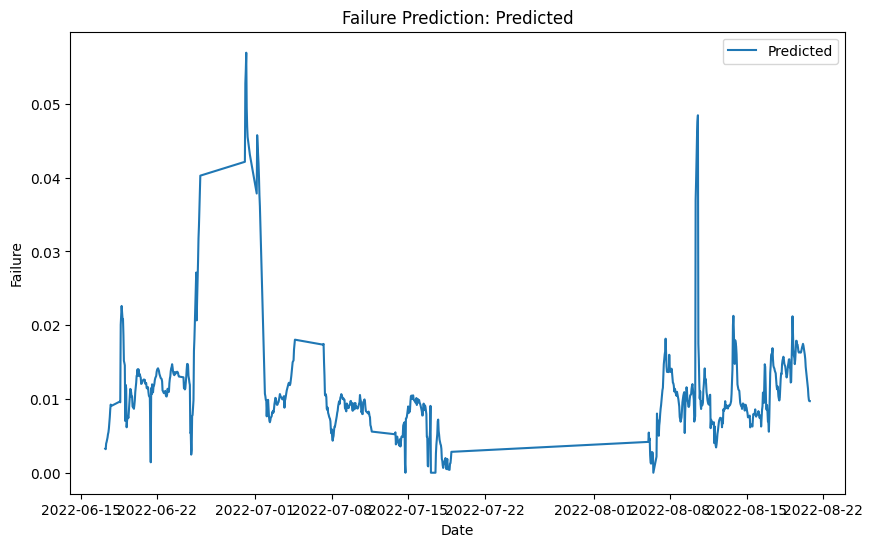

In [81]:
# Create a DataFrame for the predicted values
predicted_df = pd.DataFrame(test_predictions, columns=df_for_training.columns, index=test_data.index[n_steps:])

# Plot the predicted values
plt.figure(figsize=(10, 6))
plt.plot(predicted_df.index, predicted_df[target_variable], label='Predicted')

plt.xlabel('Date')
plt.ylabel(target_variable)
plt.title('Failure Prediction: Predicted')
plt.legend()
plt.show()

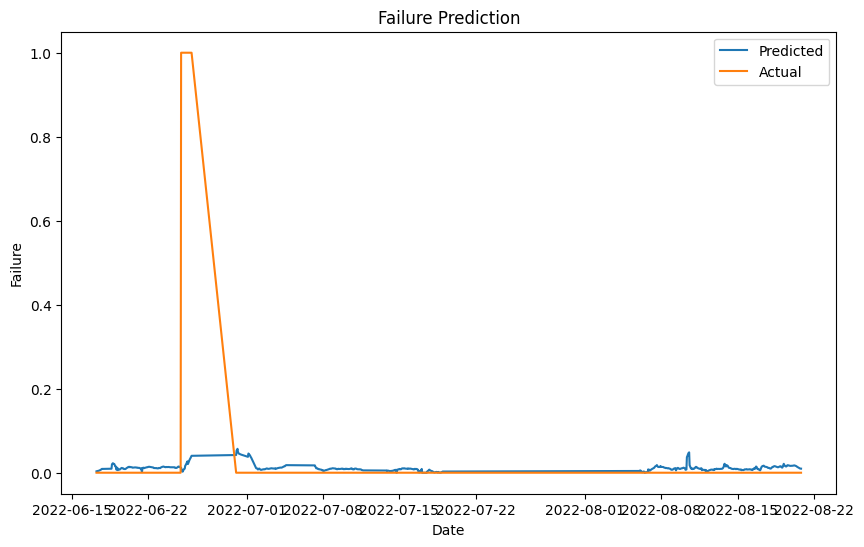

In [82]:
# Convert the predicted values to DataFrame
predicted_df = pd.DataFrame(test_predictions, columns=df_for_training.columns, index=test_data.index[n_steps:])

# Create a DataFrame for the actual values
actual_df = pd.DataFrame(test_y, columns=[target_variable], index=test_data.index[n_steps:])

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(predicted_df.index, predicted_df[target_variable], label='Predicted')
plt.plot(actual_df.index, actual_df[target_variable], label='Actual')

plt.xlabel('Date')
plt.ylabel(target_variable)
plt.title('Failure Prediction')
plt.legend()
plt.show()


In [85]:
from sklearn.metrics import accuracy_score

# Align the indices of test data and predicted values
test_data = test_data[n_steps:]
predicted_df = predicted_df[:len(test_data)]

# Convert the failure values to binary (0 or 1)
test_labels = test_data['Failure'].apply(lambda x: 1 if x >= 0.5 else 0)
predicted_labels = predicted_df['Failure'].apply(lambda x: 1 if x >= 0.5 else 0)

accuracy = accuracy_score(test_labels, predicted_labels)
accuracy

0.9716748768472906

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Bidirectional, Concatenate, Dot, Activation
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess the dataset
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df2['Time'].astype(str)
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2 = df2.drop(['Time'], axis=1)
df2 = df2.set_index("Date")
df_for_training = df2.astype(float)
target_variable = 'Failure'

# Define the feature ranges
scaling_ranges = {
    'Eqp1 Load(%)': (10, 100),
    'Eqp1 Pressure1(bar)': (2.0, 3.0),
    'Eqp1 Pressure2(bar)': (7.0, 9.0),
    'Eqp1 Supply Of oil Pressure(bar) ': (7.0, 9.0),
    'Eqp1 oil filter variations Presssure(bar)': (None, 0.6),
    'Eqp1 Temp1(degree)': (5, 20),
    'Eqp1 Temp2(degree)': (50, 70),
    'Eqp1 oil temp sensor Oil level(mm)': (150, 200),
    'Eqp2 water flow(M/hr)': (90, 125),
    'Eqp2 Incoming Pressure(bar)': (-0.5, 1.5),
    'Eqp2 OutGoing Pressure(bar)': (2.0, 4.0),
    'Eqp2 Pressure(bar) Diff': (0.1, 0.1),
    'Eqp2 Incoming Temp(degree)': (10, 35),
    'Eqp2 Outgoiing Temp(degree)': (15, 40),
    'Eqp3 cold water flow (m/hr)': (75, 75),
    'Eqp3 Incoming Pressure(bar)': (-0.5, 1),
    'Eqp3 Outgoing Pressure(bar)': (4.0, 6.0),
    'Eqp3 Variation in Pressure(bar)': (0.3, None),
    'Eqp3 Incoming Temp(degree)': (12, 25),
    'Eqp3 Outgoing Temp(degree)': (6, 20),
    }

# Apply scaling ranges to the dataset
for column, (min_value, max_value) in scaling_ranges.items():
    if min_value is not None:
        df_for_training[column] = np.where(df_for_training[column] < min_value, min_value, df_for_training[column])
    if max_value is not None:
        df_for_training[column] = np.where(df_for_training[column] > max_value, max_value, df_for_training[column])

# Split the data into train and test sets based on the specified time range
train_data = df_for_training.loc[:'2021-10-14 17:00:00']
test_data = df_for_training.loc['2021-10-14 17:00:00':'2021-10-21 19:00:00']

# Normalize the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
n_steps = 26
n_features = df_for_training.shape[1]

# Prepare the training data
train_X, train_y = [], []
for i in range(n_steps, len(train_data_scaled)):
    train_X.append(train_data_scaled[i - n_steps:i])
    train_y.append(train_data_scaled[i, df_for_training.columns.get_loc('Failure')])
train_X, train_y = np.array(train_X), np.array(train_y)

# Prepare the test data
test_X, test_y = [], []
for i in range(n_steps, len(test_data_scaled)):
    test_X.append(test_data_scaled[i - n_steps:i])
    test_y.append(test_data_scaled[i, df_for_training.columns.get_loc('Failure')])
test_X, test_y = np.array(test_X), np.array(test_y)

# Define the architecture of the Bi-LSTM encoder-decoder model with attention
encoder_inputs = Input(shape=(n_steps, n_features))
encoder = Bidirectional(LSTM(64, return_sequences=True))(encoder_inputs)
decoder_inputs = Input(shape=(n_steps, n_features))
decoder = Bidirectional(LSTM(64, return_sequences=True))(decoder_inputs)
attention = Dot(axes=[2, 2])([decoder, encoder])
attention = Activation('softmax')(attention)
context = Dot(axes=[2, 1])([attention, encoder])
decoder_combined_context = Concatenate(axis=-1)([context, decoder])
decoder_outputs = Dense(1)(decoder_combined_context)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

# Train the model
model.fit([train_X, train_X], train_y, epochs=10, batch_size=16)

# Make predictions on the test data
test_predictions = model.predict([test_X, test_X])
test_predictions.shape

Epoch 1/10
15/15 [==============================] - 5s 10ms/step - loss: 0.0718
Epoch 2/10
15/15 [==============================] - 0s 10ms/step - loss: 0.0223
Epoch 3/10
15/15 [==============================] - 0s 11ms/step - loss: 0.0137
Epoch 4/10
15/15 [==============================] - 0s 10ms/step - loss: 0.0097
Epoch 5/10
15/15 [==============================] - 0s 10ms/step - loss: 0.0122
Epoch 6/10
15/15 [==============================] - 0s 10ms/step - loss: 0.0133
Epoch 7/10
15/15 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 8/10
15/15 [==============================] - 0s 10ms/step - loss: 0.0098
Epoch 9/10
15/15 [==============================] - 0s 10ms/step - loss: 0.0090
Epoch 10/10
2/2 [==============================] - 1s 3ms/step


(34, 26, 1)

In [35]:
test_predictions = test_predictions.reshape(34,26)

In [36]:
# Invert the scaling of the predicted values
test_predictions = scaler.inverse_transform(test_predictions)
# Enforce range constraint
test_predictions = np.clip(test_predictions, 0, 1)


In [13]:
test_predictions.shape

(1, 26)

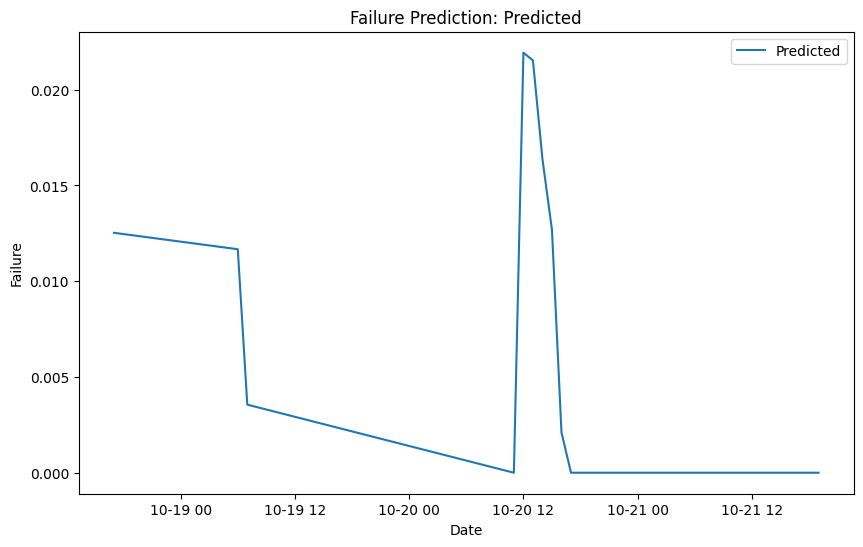

In [37]:
# Convert the predicted values to DataFrame
predicted_df = pd.DataFrame(test_predictions, columns=df_for_training.columns, index=test_data.index[n_steps:])

# Plot the predicted values
plt.figure(figsize=(10, 6))
plt.plot(predicted_df.index, predicted_df[target_variable], label='Predicted')

plt.xlabel('Date')
plt.ylabel(target_variable)
plt.title('Failure Prediction: Predicted')
plt.legend()
plt.show()


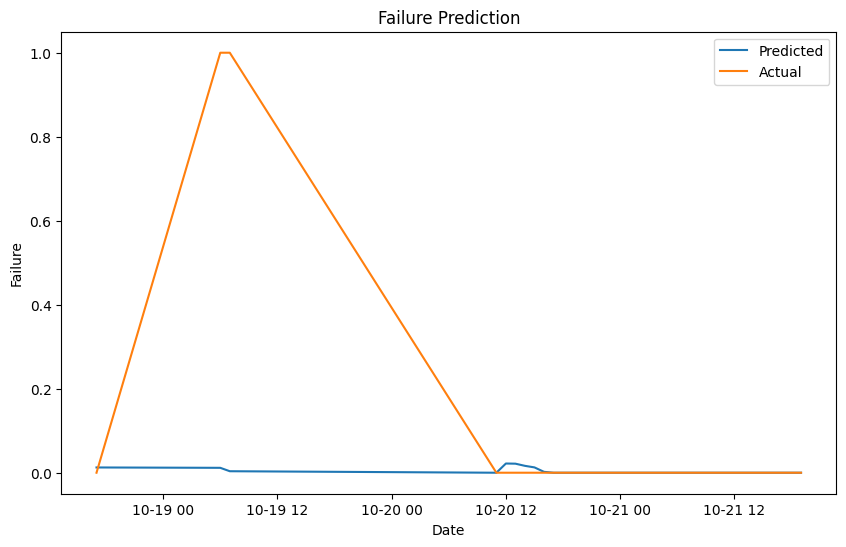

In [38]:
# Create a DataFrame for the actual values
actual_df = pd.DataFrame(test_y, columns=[target_variable], index=test_data.index[n_steps:])

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(predicted_df.index, predicted_df[target_variable], label='Predicted')
plt.plot(actual_df.index, actual_df[target_variable], label='Actual')

plt.xlabel('Date')
plt.ylabel(target_variable)
plt.title('Failure Prediction')
plt.legend()
plt.show()


In [39]:
from sklearn.metrics import accuracy_score

# Align the indices of test data and predicted values
test_data = test_data[n_steps:]
predicted_df = predicted_df[:len(test_data)]

# Convert the failure values to binary (0 or 1)
test_labels = test_data['Failure'].apply(lambda x: 1 if x >= 0.5 else 0)
predicted_labels = predicted_df['Failure'].apply(lambda x: 1 if x >= 0.5 else 0)

accuracy = accuracy_score(test_labels, predicted_labels)
accuracy

0.9411764705882353

In [54]:
# Split the data into train and test sets based on the specified time range
train_data = df_for_training.loc[:'2021-10-18 17:00:00']
test_data = df_for_training.loc['2021-10-18 17:00:00':'2021-10-20 17:00:00']

# Define the number of time steps and features
n_steps = 48  # Two days of data (24 hours per day, assuming hourly data)
n_features = df_for_training.shape[1]

# Prepare the test data
test_X, test_y = [], []
for i in range(n_steps, len(test_data_scaled)):
    test_X.append(test_data_scaled[i - n_steps:i])
    test_y.append(test_data_scaled[i, df_for_training.columns.get_loc('Failure')])
test_X, test_y = np.array(test_X), np.array(test_y)

# Make predictions on the test data
test_predictions = model.predict([test_X, test_X])
test_predictions.shape

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [53]:
forecast_copies = np.repeat(test_predictions,df_for_training.shape[1],axis=-1)
forecast_copies.shape

(14976,)

In [52]:
# Invert the scaling of the predicted values
test_predictions = scaler.inverse_transform(forecast_copies)[:,0]
# Enforce range constraint
test_predictions = np.clip(test_predictions, 0, 1)

# Create a DataFrame for the predicted values
predicted_df = pd.DataFrame(test_predictions, columns=[target_variable], index=test_data.index[n_steps:])

# Plot the predicted values
plt.figure(figsize=(10, 6))
plt.plot(predicted_df.index, predicted_df[target_variable], label='Predicted')

plt.xlabel('Date')
plt.ylabel(target_variable)
plt.title('Failure Prediction: Predicted')
plt.legend()
plt.show()

ValueError: Shape of passed values is (576, 1), indices imply (0, 1)